In [40]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

HOST = "localhost"
PORT = 4223
VC_UID = "KQz"
LC_UID = "23B3"
import time

from tinkerforge.ip_connection import IPConnection
from tinkerforge.bricklet_voltage_current_v2 import BrickletVoltageCurrentV2
from tinkerforge.bricklet_load_cell_v2 import BrickletLoadCellV2
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


ipcon = IPConnection()  # Create IP connection
vc = BrickletVoltageCurrentV2(VC_UID, ipcon)  # Create device object
lc = BrickletLoadCellV2(LC_UID, ipcon)  # Create device object
ipcon.connect(HOST, PORT)  # Connect to brickd

In [41]:
SAVE_FILENAME = "DMA_results/18.04.24_dry_polypyrrole_1Volt_4.csv"

In [43]:
import seaborn as sns
df = pd.read_csv(SAVE_FILENAME)

## TODO: calibrate!

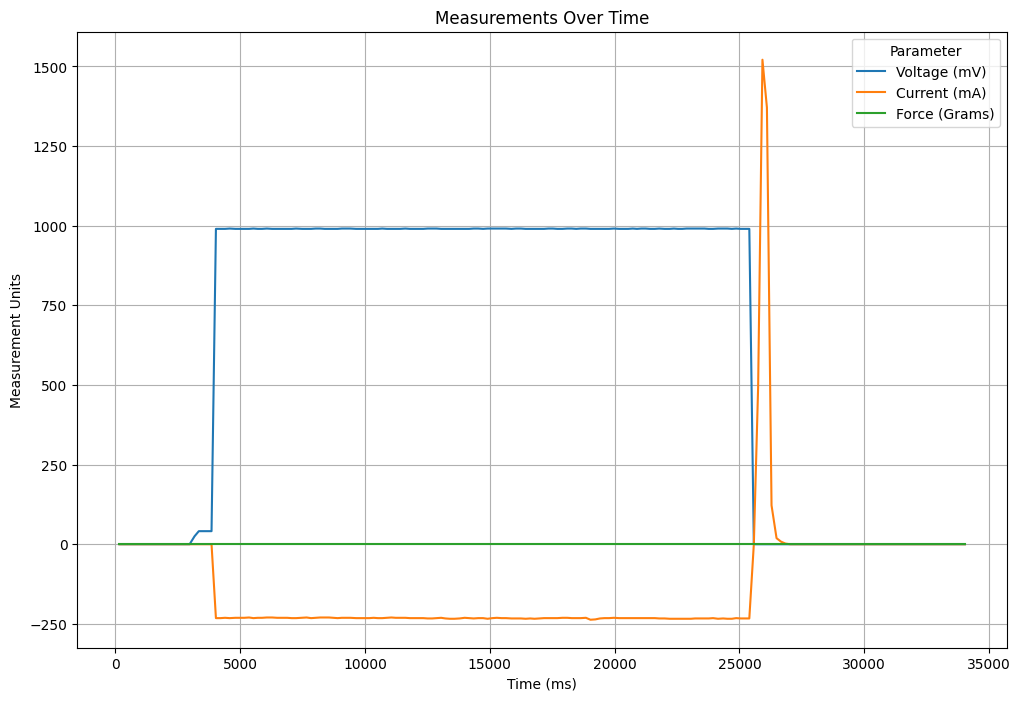

In [46]:
plt.figure(figsize=(12, 8))  # Set the figure size for better readability

# Plotting each measurement
sns.lineplot(x='Time (ms)', y='Voltage (mV)', data=df, label='Voltage (mV)')
sns.lineplot(x='Time (ms)', y='Voltage (mA)', data=df, label='Current (mA)')
sns.lineplot(x='Time (ms)', y='Force (Grams)', data=df, label='Force (Grams)')

plt.title('Measurements Over Time')  # Add a title
plt.xlabel('Time (ms)')  # Label for the x-axis
plt.ylabel('Measurement Units')  # Label for the y-axis
plt.legend(title='Parameter')  # Add a legend with a title
plt.grid(True)  # Add gridlines for better readability

plt.show()  # Display the plot


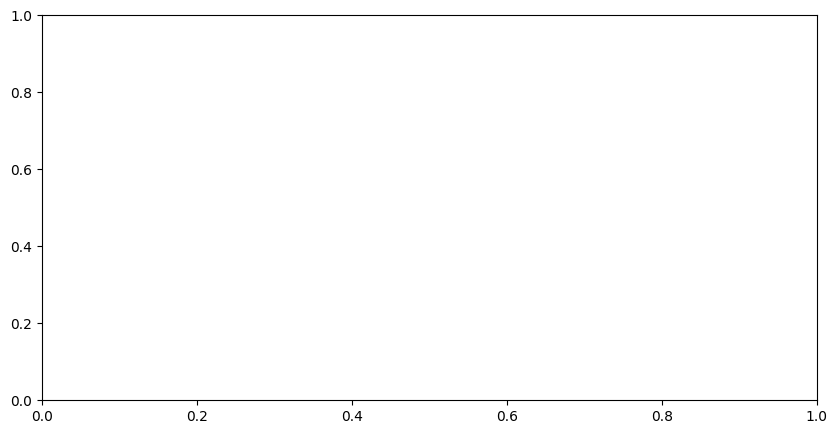

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.ion()

STARTING_LOAD = lc.get_weight()
STARTING_TIME = time.time_ns() // 1_000_000
df = pd.DataFrame(columns = ['Time (ms)', 'Voltage (mV)', 'Voltage (mA)', 'Force (Grams)'])

In [37]:
wait_time = 0.0001
while True:
    total_time = (time.time_ns() // 1_000_000) - STARTING_TIME
    voltage = vc.get_voltage()
    current = vc.get_current()
    force = lc.get_weight() - STARTING_LOAD
    new_row = pd.DataFrame(
        {
            "Time (ms)": [total_time],
            "Voltage (mV)": [voltage],
            "Voltage (mA)": [current],
            "Force (Grams)": [force],
        }
    )

    # Use concat instead of append
    df = pd.concat([df, new_row], ignore_index=True)

    ax.clear()  # Clear previous plot
    ax.plot(df["Time (ms)"], df["Voltage (mV)"], label="Voltage (mV)")
    ax.plot(df["Time (ms)"], df["Voltage (mA)"], label="Current (mA)")
    ax.plot(df["Time (ms)"], df["Force (Grams)"], label="Force (Grams)")
    ax.legend(loc="upper right")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Measurement Units")
    ax.set_title("Real-time Data Monitoring")

    display(fig)
    clear_output(wait=True)

    df.to_csv(SAVE_FILENAME)

KeyboardInterrupt: 

In [39]:
# Use concat instead of append
df = pd.concat([df, new_row], ignore_index=True)

ax.clear()  # Clear previous plot
ax.plot(df["Time (ms)"], df["Voltage (mV)"], label="Voltage (mV)")
ax.plot(df["Time (ms)"], df["Voltage (mA)"], label="Current (mA)")
ax.plot(df["Time (ms)"], df["Force (Grams)"], label="Force (Grams)")
ax.legend(loc="upper right")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Measurement Units")
ax.set_title("Real-time Data Monitoring")
plt.show()